In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path

Maybe we should find another way to reduce the amoung of dataframes.

In [2]:
# We load data
df_cpp_4_256 = pd.read_csv(path.join("benchmarks", "cpp", "20230909-152246-nb=4-th=256-cpp.csv"))
df_cpp_4_4096 = pd.read_csv(path.join("benchmarks", "cpp", "20230917-125525-nb=4-th=4096-cpp.csv"))
df_cpp_4_262144 = pd.read_csv(path.join("benchmarks", "cpp", "20230917-145712-nb=4-th=262144-cpp.csv"))

df_cpp_4_1073741824_std = pd.read_csv(path.join("benchmarks", "cpp", "20230920-231236-nb=4-th=1073741824-cpp.csv"))
df_cpp_4_1073741824_fy = pd.read_csv(path.join("benchmarks", "cpp", "20230920-233509-nb=4-th=1073741824-cpp.csv"))

df_rust_4_256 = pd.read_csv(path.join("benchmarks", "rust", "20230917-135106-nb=4-th=256-r.csv"))
df_rust_4_4096 = pd.read_csv(path.join("benchmarks", "rust", "20230917-140323-nb=4-th=4096-r.csv"))
df_rust_4_262144 = pd.read_csv(path.join("benchmarks", "rust", "20230917-144954-nb=4-th=262144-r.csv"))

In [3]:
# We format data
df_cpp_4_256_mean = df_cpp_4_256.groupby(["integers"], as_index=False)[["duration [ns]"]].mean()
df_cpp_4_4096_mean = df_cpp_4_4096.groupby(["integers"], as_index=False)[["duration [ns]"]].mean()
df_cpp_4_262144_mean = df_cpp_4_262144.groupby(["integers"], as_index=False)[["duration [ns]"]].mean()

df_cpp_4_1073741824_std_mean = df_cpp_4_1073741824_std.groupby(["integers"], as_index=False)[["duration [ns]"]].mean()
df_cpp_4_1073741824_fy_mean = df_cpp_4_1073741824_fy.groupby(["integers"], as_index=False)[["duration [ns]"]].mean()

df_rust_4_256_mean = df_rust_4_256.groupby(["integers"], as_index=False)[["duration [ns]"]].mean()
df_rust_4_4096_mean = df_rust_4_4096.groupby(["integers"], as_index=False)[["duration [ns]"]].mean()
df_rust_4_262144_mean = df_rust_4_262144.groupby(["integers"], as_index=False)[["duration [ns]"]].mean()

Text(0, 0.5, 'runtime [ns]')

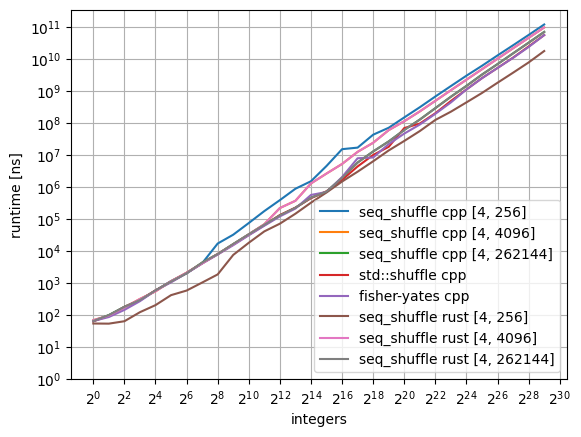

In [4]:
# We plot data
ax_xticks = [2 ** i for i in range(0, 31, 2)]
ax_yticks = [10 ** i for i in range(0, 12, 1)]

ax = df_cpp_4_256_mean.plot(x="integers", y="duration [ns]", label="seq_shuffle cpp [4, 256]")
df_cpp_4_4096_mean.plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle cpp [4, 4096]")
df_cpp_4_262144_mean.plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle cpp [4, 262144]")

df_cpp_4_1073741824_std_mean.plot(ax=ax, x="integers", y="duration [ns]", label="std::shuffle cpp")
df_cpp_4_1073741824_fy_mean.plot(ax=ax, x="integers", y="duration [ns]", label="fisher-yates cpp")

df_rust_4_256_mean.plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle rust [4, 256]")
df_cpp_4_4096_mean.plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle rust [4, 4096]")
df_cpp_4_262144_mean.plot(ax=ax, x="integers", y="duration [ns]", label="seq_shuffle rust [4, 262144]")

ax.set_xscale("log", base=2)
ax.set_yscale("log", base=10)
ax.set_xticks(ax_xticks)
ax.set_yticks(ax_yticks)
ax.grid(True)
ax.set_xlabel("integers")
ax.set_ylabel("runtime [ns]")

As the result above doesn't help us much, let's look into runtime per integer.

In [5]:
# We add a new column
df_cpp_4_256_mean["runtime per integer [ns]"] = df_cpp_4_256_mean["duration [ns]"] / df_cpp_4_256_mean["integers"]
df_cpp_4_4096_mean["runtime per integer [ns]"] = df_cpp_4_4096_mean["duration [ns]"] / df_cpp_4_4096_mean["integers"]
df_cpp_4_262144_mean["runtime per integer [ns]"] = df_cpp_4_262144_mean["duration [ns]"] / df_cpp_4_262144_mean["integers"]

df_cpp_4_1073741824_std_mean["runtime per integer [ns]"] = df_cpp_4_1073741824_std_mean["duration [ns]"] / df_cpp_4_1073741824_std_mean["integers"]
df_cpp_4_1073741824_fy_mean["runtime per integer [ns]"] = df_cpp_4_1073741824_fy_mean["duration [ns]"] / df_cpp_4_1073741824_fy_mean["integers"]

df_rust_4_256_mean["runtime per integer [ns]"] = df_rust_4_256_mean["duration [ns]"] / df_rust_4_256_mean["integers"]
df_rust_4_4096_mean["runtime per integer [ns]"] = df_rust_4_4096_mean["duration [ns]"] / df_rust_4_4096_mean["integers"]
df_rust_4_262144_mean["runtime per integer [ns]"] = df_rust_4_262144_mean["duration [ns]"] / df_rust_4_262144_mean["integers"]

Text(0, 0.5, 'runtime/integer [ns]')

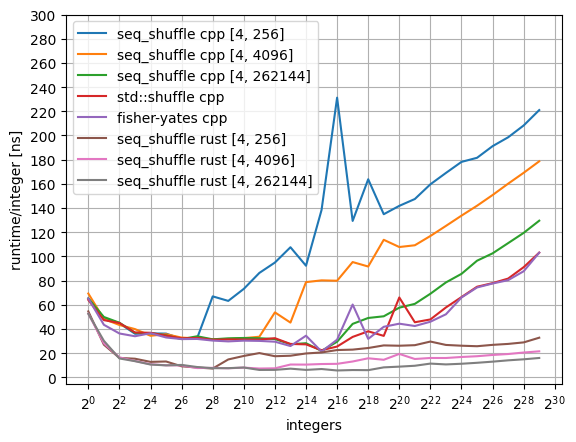

In [23]:
# We plot data
ax_2_xticks = ax_xticks
ax_2_yticks = [10 * i for i in range(0, 31, 2)]

ax_2 = df_cpp_4_256_mean.plot(x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [4, 256]")
df_cpp_4_4096_mean.plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [4, 4096]")
df_cpp_4_262144_mean.plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle cpp [4, 262144]")

df_cpp_4_1073741824_std_mean.plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="std::shuffle cpp")
df_cpp_4_1073741824_fy_mean.plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="fisher-yates cpp")

df_rust_4_256_mean.plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle rust [4, 256]")
df_rust_4_4096_mean.plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle rust [4, 4096]")
df_rust_4_262144_mean.plot(ax=ax_2, x="integers", y="runtime per integer [ns]", label="seq_shuffle rust [4, 262144]")

ax_2.set_xscale("log", base=2)
#ax_2.set_yscale("log", base=10)
ax_2.set_xticks(ax_2_xticks)
ax_2.set_yticks(ax_2_yticks)
ax_2.grid(True)
ax_2.set_xlabel("integers")
ax_2.set_ylabel("runtime/integer [ns]")

In [40]:
df_cpp_4_256.loc[(df_cpp_4_256["integers"] == 2 ** 16)]

,buckets,threshold,run,integers,duration [ns]
160,4,256,1,65536,52905515
161,4,256,2,65536,18477594
162,4,256,3,65536,14033366
163,4,256,4,65536,14802765
164,4,256,5,65536,10128697
165,4,256,6,65536,8400749
166,4,256,7,65536,8005104
167,4,256,8,65536,8269088
168,4,256,9,65536,8052791
169,4,256,10,65536,8475562


In [44]:
df_cpp_4_256.loc[(df_cpp_4_256["integers"] == 2 ** 16)].quantile()

buckets                4.0
threshold            256.0
run                    5.5
integers           65536.0
duration [ns]    9302129.5
Name: 0.5, dtype: float64

,integers,duration [ns],runtime per integer [ns]
0,1,6.530000e+01,65.300000
1,2,9.820000e+01,49.100000
2,4,1.789000e+02,44.725000
3,8,2.881000e+02,36.012500
4,16,5.809000e+02,36.306250
5,32,1.156900e+03,36.153125
6,64,2.032900e+03,31.764063
7,128,4.153100e+03,32.446094
8,256,1.713460e+04,66.932031
9,512,3.235810e+04,63.199414
